# Challenge State of Data

### 🎲 Sobre os dados

O questionário foi dividido em 8 partes, e dentro de cada uma das partes temos as perguntas e opções de escolha.

Cada pergunta é dividida em parte, letra da pergunta e número da opção escolhida (as perguntas que tem opção são variáveis dummy)
- Exemplo: P3a_1 = Parte 3, pergunta (a), opção (1)


Parte | Descrição | Variáveis mais importantes
--- | --- | ---
Parte 1 | Dados demográficos | Gênero, idade, cor/raça/etnia, PCD, localização, nível de ensino, área de formação, experiência profissional prejudicada
Parte 2 | Dados sobre carreira | Setor e tamanho da empresa, situação e forma de trabalho, cargo, salário, experiência, satisfação no trabalho
Parte 3 | Desafios dos gestores de times de dados | Tamanho e maturidade da área de dados na empresa, rotina e desafios do gestor
Parte 4 | Conhecimentos na área de dados | Ferramentas de cada área, fontes de dados, linguagens, cloud, power BI
Parte 5 | Objetivos na área de dados | Busca por oportunidades (campos abertos)
Parte 6 | Conhecimentos em Engenharia de Dados/DE | Atividades da rotina, ferramentas, presença de data lake e data warehouse, ferramentas de gestão
Parte 7 | Conhecimentos em Análise de Dados/DA | Rotina de trabalho, ferramentas para dar autonomia para áreas de negócio
Parte 8 | Conhecimentos em Ciências de Dados/DS | Rotina de trabalho, técnicas e métodos, tecnologias

Quais as entregas esperadas no challenge?

- Fazer uma análise exploratória e visual dos dados
- Fazer análises complexas utilizando técnicas avançadas de Machine Learning
- Usar libs de apps de dados como shiny ou streamlit

### 🎯 Foco da análise

**Quem contratou a análise?**

Uma consultoria de RH / tech recruiter - atração e seleção de novos talentos para a empresa

### 🕵🏻‍♀️ Mindmap - Perguntas a serem respondidas na análise exploratória

O que influencia na insatisfação dos profissionais na empresa em que trabalham atualmente? | Prioridade
--- | ---
Empresas com uma área de dados mais madura possuem funcionários mais satisfeitos? | 1
O que impacta na experiência e satisfação de colaboradores que fazem parte de um ou mais grupos de diversidade? | 1
. . . . Empresas maiores oferecem uma melhor experiência e um suporte maior para essas pessoas? | 1
. . . . A senioridade da pessoa impacta na satisfação / experiência? | 1
. . . . A forma de trabalho atual (remoto, híbrido, presencial) e um possível retorno ao presencial impacta na satisfação? | 1
Tempo de experiência e área de formação influenciam na confiança e conhecimento (ferramentas, linguagens) que a pessoa tem para desenvolver os projetos? | 1
Pessoas que não podem implementar soluções com ferramentas que elas acreditam ser mais adequadas para o problema são mais insatisfeitas? | 2
A localização influencia na satisfação da pessoa na área de dados? | 2
Ter muitas reuniões durante o dia deixa as pessoas mais insatisfeitas? | 2
Existe alguma ferramenta ou conjunto de ferramentas que torna o trabalho mais satisfatório? | 2
Quais objetivos em comum para cada nível de senioridade? | 3
Pessoas que tem objetivos mais bem definidos são mais satisfeitas? | 3

<br>

Estes profissionais estão mais propensos a sair da empresa atual e aceitar uma nova proposta? | Prioridade
--- | ---
Das features que impactam a satistação dos profissionais, quais se relacionam com a propensão de aceitar uma nova proposta? | 4
Relacionar os critérios para escolha de um novo emprego com essas features | 4


### 🚀 Análises complementares

Usando dados externos

- Seria interessante comparar os dados demográficos obtidos na pesquisa com os dados demográficos da população brasileira, para obter insights sobre a diversidade e inclusão da área.
- Seria interessante também saber os dados demográficos dos profissionais de dados no Brasil (que responderam ou não à pesquisa), para que seja possível conhecer a representatividade dos dados da pesquisa na área
    - Quem é o público? Quão enviesada a pesquisa pode estar por não ter conseguido alcançar uma parcela representativa da população dos profissionais de dados brasileiros?
    - A carreira na área de dados/tecnologia é inclusiva para pessoas com deficiência?

Mercado de trabalho - ferramentas, atividades, tecnologias

- Quais são as principais ferramentas do cientista de dados?
- Quais são as principais atividades da rotina do cientista de dados?
- Quais são os principais objetivos que os profissionais possuem na carreira?
- Quais os desafios dos gestores de empresas que possuem uma maturidade maior em projetos de dados?
- Empresas de um mesmo setor possuem desafios na área de dados semelhantes?
- O Brasil está perdendo os profissionais da área de dados? O mercado no exterior está mais atrativo/competitivo?

## 0. Configuração do ambiente

### 0.1. Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

### 0.2. Dados

In [2]:
data = pd.read_csv('State_of_data_2022.csv')
infos_ufs = gpd.read_file('bcim_2016_21_11_2018.gpkg', layer = 'lim_unidade_federacao_a')

In [3]:
# criar dicionário com a descrição de cada parte

descricao_parte = {
    'parte': ['parte1', 'parte2', 'parte3', 'parte4', 'parte5', 'parte6', 'parte7', 'parte8'],
    'descricao': ['dados demográficos', 
                  'dados sobre carreira', 
                  'desafios dos gestores de times de dados',
                  'conhecimentos na área de dados',
                  'objetivos na área de dados',
                  'conhecimentos em engenharia de dados',
                  'conhecimentos em análise de dados',
                  'conhecimentos em ciência de dados']
}

descricao_parte = pd.DataFrame(descricao_parte)

## 1. Visão geral do dataframe

In [5]:
# número de linhas e de colunas

data.shape

(4271, 353)

In [ ]:
# como esta base tem muitas colunas, vou checar os temas pelas partes

### 1.1. Função para gerar tabelas de descrição para cada parte

In [4]:
# função para criar uma tabela para cada parte, separando o código, a descrição, a pergunta e as opções

def gerar_tabela_descricao(parte):

    df = data.filter(regex = "^\('P" + str(parte), axis=1).columns.to_frame(name = 'lista').reset_index(drop = True)

    separar = df['lista'].str.split(',', n = 1, expand = True)

    df['codigo'] = separar[0]
    df['codigo'] = df['codigo'].str.replace('(', '')
    df['codigo'] = df['codigo'].str.replace("'", '')
    df['codigo'] = df['codigo'].str.strip()

    df['descricao'] = separar[1]
    df['descricao'] = df['descricao'].str.replace(')', '')
    df['descricao'] = df['descricao'].str.replace("'", '')

    df['pergunta'] = df['codigo'].apply(lambda x: x[3])
    df['opcao'] = df['codigo'].apply(lambda x: x[5] if len(x) >= 6 else None)

    df = df.drop(['lista'], axis = 1)

    return df

# deixar cada dataframe gerado disponível no ambiente de variáveis

for i in list(range(1, 9)):

    dataframe_name = f'parte{i}_descricao'
    df = gerar_tabela_descricao(parte = i)
    globals()[dataframe_name] = df

### 1.2. Função para gerar tabelas para cada parte, alterando o nome das colunas para ser apenas o código

In [5]:
# função para criar uma tabela para cada parte, trocando o nome das colunas em forma de código para apenas a tupla

def partes(parte):

    # selecionar as colunas da parte
    df = data.filter(regex = "^\('P" + str(parte), axis = 1)

    # selecionar a coluna de id
    df_id = data[["('P0', 'id')"]]

    # juntar a coluna de id com as colunas das partes
    df = pd.concat([df_id, df], axis = 1)

    # simplificar os nomes das colunas
    parte_n = eval('parte' + str(parte) + '_descricao')
    df.columns = ['P0'] + parte_n['codigo'].tolist()

    return df

# deixar os dataframes no ambiente de variáveis

for i in list(range(1, 9)):
    
    dataframe_name = f'parte{i}'
    df = partes(parte = i)
    globals()[dataframe_name] = df # coloca no ambiente de variaveis

### 1.3. Função para calcular o percentual de missings de cada coluna

In [6]:
# função para acrescentar uma coluna com o percentual de missings na tabela de descricao

def perc_missings(n_df):

    df_ = eval('parte' + str(n_df) + '_descricao').copy()
    df_['perc_miss'] = df_['codigo'].apply(lambda x: round(eval('parte' + str(n_df))[x].isna().mean() * 100, 2))

    return df_

### 1.4. Análises dos dataframes

In [7]:
# quantas colunas tem em cada parte?

descricao_parte_colunas = descricao_parte.copy()

descricao_parte_colunas['n_colunas'] = descricao_parte_colunas['parte'].apply(lambda x: len(eval(x + '_descricao')))
descricao_parte_colunas['n_perguntas_diferentes'] =  descricao_parte_colunas['parte'].apply(lambda x: eval(x + '_descricao')['pergunta'].nunique())

descricao_parte_colunas

# na forma de lista
# for i in [key for key in list(globals().keys()) if key.startswith('parte')]:
#     print(i, ":", len(eval(i)))

,parte,descricao,n_colunas,n_perguntas_diferentes
0,parte1,dados demográficos,15,12
1,parte2,dados sobre carreira,36,19
2,parte3,desafios dos gestores de times de dados,38,4
3,parte4,conhecimentos na área de dados,100,9
4,parte5,objetivos na área de dados,4,4
5,parte6,conhecimentos em engenharia de dados,59,8
6,parte7,conhecimentos em análise de dados,50,5
7,parte8,conhecimentos em ciência de dados,50,5


## 2. Distribuições das variáveis demográficas

In [49]:
# olhar os nomes das colunas e o percentual de missings de cada coluna

perc_missings(n_df = 1)#.sort_values('perc_miss', ascending = False)

,codigo,descricao,pergunta,opcao,perc_miss
0,P1_a,Idade,a,None,1.73
1,P1_a_1,Faixa idade,a,1,0.00
2,P1_b,Genero,b,None,0.21
3,P1_c,Cor/raca/etnia,c,None,0.00
4,P1_d,PCD,d,None,0.00
5,P1_e,experiencia_profissional_prejudicada,e,None,48.72
6,P1_f,aspectos_prejudicados,f,None,80.40
7,P1_g,vive_no_brasil,g,None,0.00
8,P1_i,Estado onde mora,i,None,2.69
9,P1_i_1,uf onde mora,i,1,2.69


In [8]:
# visão geral dos dados

parte1.head()

,P1_a,P1_a_1,P1_b,P1_c,P1_d,P1_e,P1_f,P1_g,P1_i,P1_i_1,P1_i_2,P1_j,P1_k,P1_l,P1_m
0,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),DF,Centro-oeste,False,Sudeste,Pós-graduação,Computação / Engenharia de Software / Sistemas...
1,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),PA,Norte,True,NaN,Graduação/Bacharelado,Outras Engenharias
2,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),DF,Centro-oeste,False,Sul,Pós-graduação,Computação / Engenharia de Software / Sistemas...
3,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),MG,Sudeste,True,NaN,Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...
4,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),PA,Norte,True,NaN,Pós-graduação,Computação / Engenharia de Software / Sistemas...


### Idade

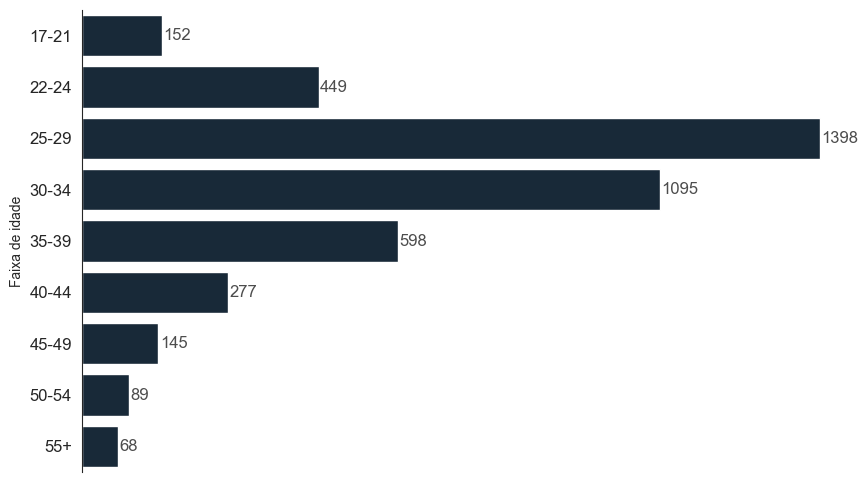

In [35]:
# parte1['P1_a_1'].value_counts().to_frame().reset_index().sort_values('P1_a_1')

plt.figure(figsize = (10, 6))
sns.set_style('white') # also 'ticks', 'darkgrid', 'whitegrid', white
fig = sns.barplot(data = parte1['P1_a_1'].value_counts().to_frame().reset_index().sort_values('P1_a_1'), 
                  x = 'count', 
                  y = 'P1_a_1', 
                  color = '#13293d')

# colocar os números no final da barra
for i in fig.patches:
    fig.annotate(int(i.get_width()),
                  (i.get_width(), i.get_y() + i.get_height() / 2),
                  ha = 'left', va = 'center', fontsize = 12,
                  color = '#4d4d4d', xytext = (1, 0),
                  textcoords = 'offset points')
    
# mudar os títulos dos eixos
fig.set_ylabel('Faixa de idade')
fig.set_xlabel('')

# remover os números do eixo x
fig.set_xticklabels('')
fig.set_yticklabels(fig.get_yticklabels(), fontsize=12)

# remover as bordas do gráfico
sns.despine(bottom = True)

# deixar o gráfico transparente
# plt.gcf().set_facecolor('none')
# plt.gca().patch.set_alpha(0)

In [8]:
# qual a distribuição de faixa de idade para quem não informou idade?

parte1[parte1['P1_a'].isna()]['P1_a_1'].value_counts()

P1_a_1
55+      68
17-21     6
Name: count, dtype: int64

In [ ]:
# aparentemente, os nulos foram preenchidos ou com a menor faixa de idade ou com a maior

### Gênero

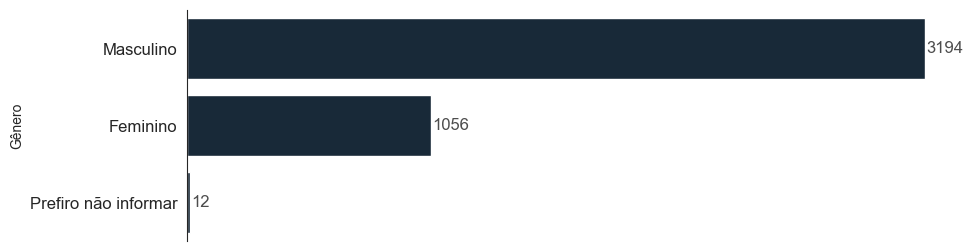

In [38]:
# parte1['P1_a_1'].value_counts().to_frame().reset_index().sort_values('P1_a_1')

plt.figure(figsize = (10, 3))
sns.set_style('white') # also 'ticks', 'darkgrid', 'whitegrid', white
fig = sns.barplot(data = parte1['P1_b'].value_counts().to_frame().reset_index().sort_values('count', ascending = False), 
                  x = 'count', 
                  y = 'P1_b', 
                  color = '#13293d')

# colocar os números no final da barra
for i in fig.patches:
    fig.annotate(int(i.get_width()),
                  (i.get_width(), i.get_y() + i.get_height() / 2),
                  ha = 'left', va = 'center', fontsize = 12,
                  color = '#4d4d4d', xytext = (1, 0),
                  textcoords = 'offset points')
    
# mudar os títulos dos eixos
fig.set_ylabel('Gênero')
fig.set_xlabel('')

# remover os números do eixo x
fig.set_xticklabels('')
fig.set_yticklabels(fig.get_yticklabels(), fontsize=12)

# remover as bordas do gráfico
sns.despine(bottom = True)

# deixar o gráfico transparente
# plt.gcf().set_facecolor('none')
# plt.gca().patch.set_alpha(0)

### Idade + Gênero

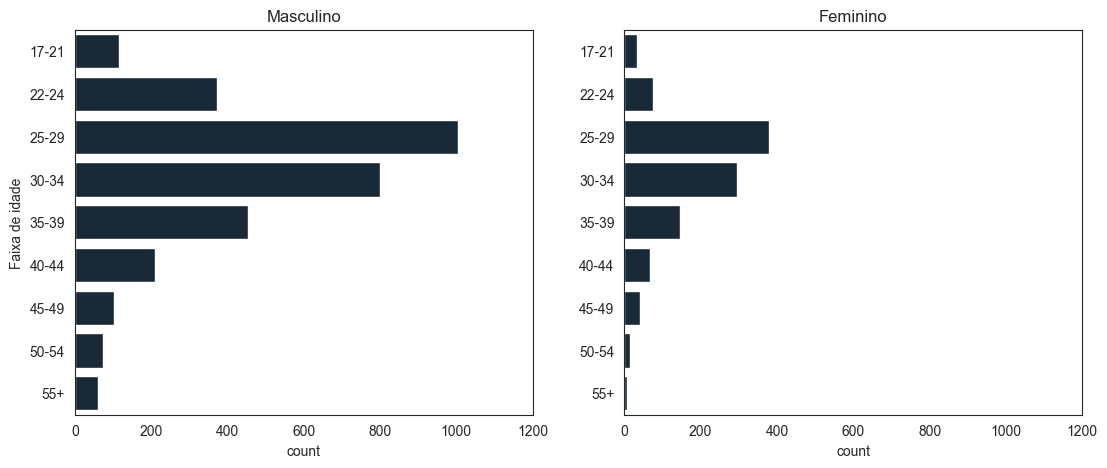

In [28]:
# criar uma figura e os subplots
fig, axes = plt.subplots(1, 2, figsize = (13, 5))

df = parte1[['P1_a_1', 'P1_b']].value_counts().to_frame().reset_index().sort_values('P1_a_1', ascending = True)

# G1
sns.barplot(x = 'count',
            y = 'P1_a_1',
            data = df[df['P1_b'] == 'Masculino'],
            ax = axes[0],
            orient = 'h',
            palette = ['#13293d'])

axes[0].set_title('Masculino')

# G2
sns.barplot(x = 'count',
            y = 'P1_a_1',
            data = df[df['P1_b'] == 'Feminino'],
            ax = axes[1],
            orient = 'h',
            palette = ['#13293d'])

axes[1].set_title('Feminino')

# definir o mesmo limite do eixo x para ambos os gráficos
axes[0].set_xlim(0, 1200)
axes[1].set_xlim(0, 1200)

# nome do eixo y
axes[0].set_ylabel('Faixa de idade')
axes[1].set_ylabel('')

# exibir os gráficos
plt.show()

### Raça/cor/etnia

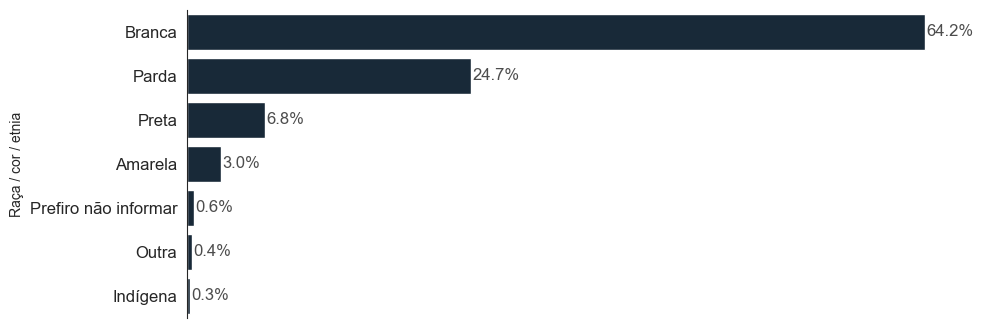

In [38]:
raca_cor_etnia = parte1['P1_c'].value_counts().to_frame().reset_index()
raca_cor_etnia['percentual'] = round(raca_cor_etnia['count'] * 100 / len(parte1), 1)

plt.figure(figsize = (10, 4))
sns.set_style('white') # also 'ticks', 'darkgrid', 'whitegrid', white

fig = sns.barplot(data = raca_cor_etnia, 
                  x = 'percentual', 
                  y = 'P1_c', 
                  color = '#13293d')

# colocar os números no final da barra
for i in fig.patches:
    fig.annotate((i.get_width()).astype(str) + '%',
                 (i.get_width(), i.get_y() + i.get_height() / 2),
                 ha = 'left', va = 'center', fontsize = 12,
                 color = '#4d4d4d', xytext = (1, 0),
                 textcoords = 'offset points')
    
# mudar os títulos dos eixos
fig.set_ylabel('Raça / cor / etnia')
fig.set_xlabel('')

# remover os números do eixo x
fig.set_xticklabels('')
fig.set_yticklabels(fig.get_yticklabels(), fontsize=12)

# remover as bordas do gráfico
sns.despine(bottom = True)

### Pessoas com deficiência

In [33]:
pcd = parte1['P1_d'].value_counts().to_frame().reset_index()
pcd['percentual'] = round(pcd['count'] * 100 / len(parte1), 1)

pcd


,P1_d,count,percentual
0,Não,4198,98.3
1,Sim,54,1.3
2,Prefiro não informar,19,0.4


### Localização

In [9]:
# qual o percentual de respondentes por região do Brasil?

regiao = parte1['P1_i_2'].value_counts(dropna = False).to_frame().reset_index()
regiao['percentual'] = round(regiao['count'] * 100 / len(parte1), 1)

regiao

,P1_i_2,count,percentual
0,Sudeste,2642,61.9
1,Sul,669,15.7
2,Nordeste,562,13.2
3,Centro-oeste,222,5.2
4,NaN,100,2.3
5,Norte,76,1.8


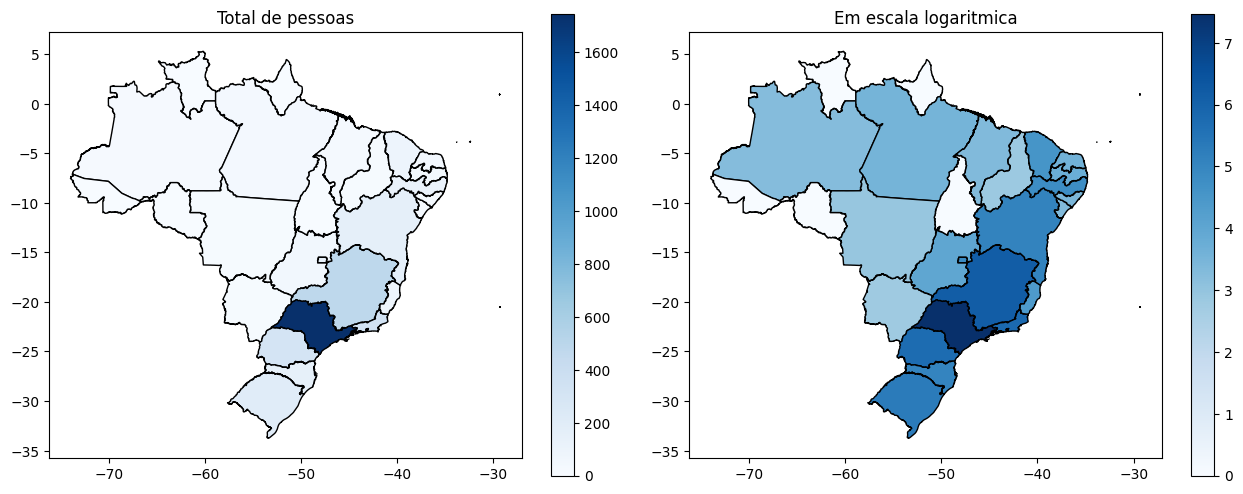

In [42]:
# créditos gráfico: https://rodrigodutcosky.medium.com/mapas-coropl%C3%A9ticos-com-os-estados-do-brasil-em-python-b9b48c6db585

estado = parte1['P1_i_1'].value_counts(dropna = False).to_frame().reset_index()
estado['percentual'] = round(estado['count'] * 100 / len(parte1), 1)

infos_ufs.rename({'sigla': 'P1_i_1'}, axis = 1, inplace = True)

total_estado = infos_ufs.merge(estado, on = 'P1_i_1', how = 'left')

total_estado[['P1_i_1', 'count', 'geometry']]

# preencher NaN com 0
total_estado['count'] = total_estado['count'].fillna(value = 0)
total_estado['percentual'] = total_estado['percentual'].fillna(value = 0)
total_estado['count_log'] = total_estado['count'].apply(lambda x: np.log(x) if x > 0 else 0)

# gráfico de mapa
%matplotlib inline

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

# G1
total_estado.plot(column = 'count',
                  cmap = 'Blues',
                  figsize = (10, 6),
                  ax = axes[0],
                  legend = True,
                  edgecolor = 'black')

axes[0].set_title('Total de pessoas')

# G2
total_estado.plot(column = 'count_log',
                  cmap = 'Blues',
                  figsize = (10, 6),
                  ax = axes[1],
                  legend = True,
                  edgecolor = 'black')

axes[1].set_title('Em escala logaritmica')

plt.tight_layout()


### Nível de ensino

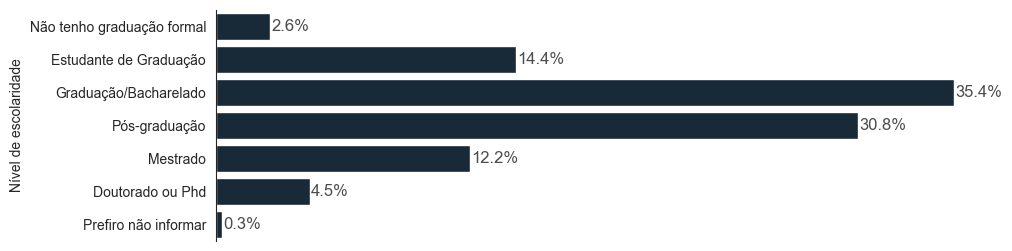

In [61]:
nivel_ensino = parte1['P1_l'].value_counts(dropna = False).to_frame().reset_index()
nivel_ensino['percentual'] = round(nivel_ensino['count'] * 100 / len(parte1), 1)

ordem_escolaridade = {'Não tenho graduação formal': 1,
                      'Estudante de Graduação':2,
                      'Graduação/Bacharelado':3,
                      'Pós-graduação':4,
                      'Mestrado':5,
                      'Doutorado ou Phd':6,
                      'Prefiro não informar':7}

nivel_ensino['ordem'] = nivel_ensino['P1_l'].map(ordem_escolaridade)

plt.figure(figsize = (10, 3))
sns.set_style('white') # also 'ticks', 'darkgrid', 'whitegrid', white

fig = sns.barplot(data = nivel_ensino.sort_values('ordem'), 
                  x = 'percentual', 
                  y = 'P1_l', 
                  color = '#13293d')

# colocar os números no final da barra
for i in fig.patches:
    fig.annotate((i.get_width()).astype(str) + '%',
                 (i.get_width(), i.get_y() + i.get_height() / 2),
                 ha = 'left', va = 'center', fontsize = 12,
                 color = '#4d4d4d', xytext = (1, 0),
                 textcoords = 'offset points')
    
# mudar os títulos dos eixos
fig.set_ylabel('Nível de escolaridade')
fig.set_xlabel('')

# remover os números do eixo x
fig.set_xticklabels('')
fig.set_yticklabels(fig.get_yticklabels(), fontsize=10)

# remover as bordas do gráfico
sns.despine(bottom = True)

### Área de formação

In [65]:
pd.set_option('display.max_colwidth', None)

area_formacao = parte1['P1_m'].value_counts(dropna = False).to_frame().reset_index()
area_formacao['percentual'] = round(area_formacao['count'] * 100 / len(parte1), 1)

area_formacao

,P1_m,count,percentual
0,Computação / Engenharia de Software / Sistemas de Informação/ TI,1543,36.1
1,Outras Engenharias,941,22.0
2,Economia/ Administração / Contabilidade / Finanças/ Negócios,641,15.0
3,Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais,405,9.5
4,Outra opção,200,4.7
5,Marketing / Publicidade / Comunicação / Jornalismo,122,2.9
6,NaN,122,2.9
7,Química / Física,112,2.6
8,Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde,111,2.6
9,Ciências Sociais,74,1.7


## 3. Distribuições das variáveis organizacionais

### Situação de trabalho

In [66]:
situacao_trabalho = parte2['P2_a'].value_counts(dropna = False).to_frame().reset_index()
situacao_trabalho['percentual'] = round(situacao_trabalho['count'] * 100 / len(parte1), 1)

situacao_trabalho

,P2_a,count,percentual
0,Empregado (CLT),2762,64.7
1,Empreendedor ou Empregado (CNPJ),410,9.6
2,"Desempregado, buscando recolocação",350,8.2
3,Estagiário,188,4.4
4,Servidor Público,156,3.7
5,Trabalho na área Acadêmica/Pesquisador,86,2.0
6,Somente Estudante (graduação),82,1.9
7,Vivo no Brasil e trabalho remoto para empresa de fora do Brasil,69,1.6
8,Vivo fora do Brasil e trabalho para empresa de fora do Brasil,46,1.1
9,Somente Estudante (pós-graduação),44,1.0


### Setor

In [69]:
setor_empresa = parte2['P2_b'].value_counts(dropna = False).to_frame().reset_index()
setor_empresa['percentual'] = round(setor_empresa['count'] * 100 / len(parte1), 1)

setor_empresa

,P2_b,count,percentual
0,Tecnologia/Fábrica de Software,718,16.8
1,Finanças ou Bancos,600,14.0
2,NaN,577,13.5
3,Varejo,308,7.2
4,Área de Consultoria,277,6.5
5,Outra Opção,269,6.3
6,Indústria,218,5.1
7,Área da Saúde,179,4.2
8,Internet/Ecommerce,167,3.9
9,Setor Público,150,3.5


### Tamanho da empresa

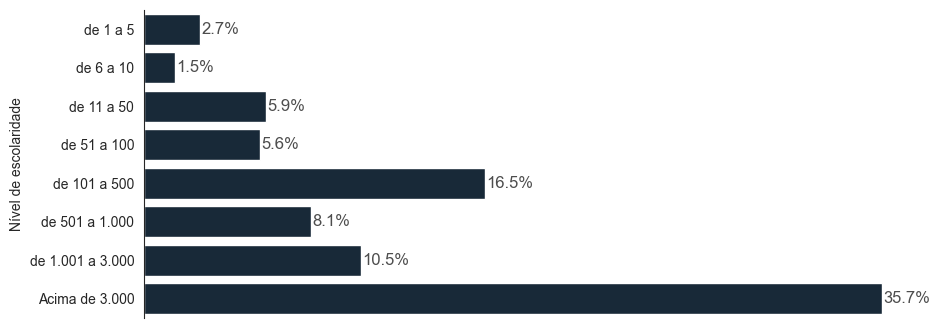

In [79]:
setor_empresa = parte2['P2_c'].value_counts(dropna = False).to_frame().reset_index()
setor_empresa['percentual'] = round(setor_empresa['count'] * 100 / len(parte1), 1)

ordem_tamanho = {'de 1 a 5': 1,
                 'de 6 a 10':2,
                 'de 11 a 50':3,
                 'de 51 a 100':4,
                 'de 101 a 500':5,
                 'de 501 a 1.000':6,
                 'de 1.001 a 3.000':7,
                 'Acima de 3.000':8}

setor_empresa['ordem'] = setor_empresa['P2_c'].map(ordem_tamanho)

plt.figure(figsize = (10, 4))
sns.set_style('white') # also 'ticks', 'darkgrid', 'whitegrid', white

fig = sns.barplot(data = setor_empresa.sort_values('ordem'), 
                  x = 'percentual', 
                  y = 'P2_c', 
                  color = '#13293d')

# colocar os números no final da barra
for i in fig.patches:
    fig.annotate((i.get_width()).astype(str) + '%',
                 (i.get_width(), i.get_y() + i.get_height() / 2),
                 ha = 'left', va = 'center', fontsize = 12,
                 color = '#4d4d4d', xytext = (1, 0),
                 textcoords = 'offset points')
    
# mudar os títulos dos eixos
fig.set_ylabel('Nível de escolaridade')
fig.set_xlabel('')

# remover os números do eixo x
fig.set_xticklabels('')
fig.set_yticklabels(fig.get_yticklabels(), fontsize=10)

# remover as bordas do gráfico
sns.despine(bottom = True)

### Cargo

In [43]:
# cargos disponíveis

cargo = parte2['P2_f'].value_counts(dropna = False).to_frame().reset_index()
cargo['percentual'] = round(cargo['count'] * 100 / len(parte1), 1)

cargo

,P2_f,count,percentual
0,NaN,1290,30.2
1,Analista de Dados/Data Analyst,639,15.0
2,Cientista de Dados/Data Scientist,556,13.0
3,Engenheiro de Dados/Arquiteto de Dados/Data En...,490,11.5
4,Analista de BI/BI Analyst,378,8.9
5,Outra Opção,281,6.6
6,Analista de Negócios/Business Analyst,123,2.9
7,Desenvolvedor/ Engenheiro de Software/ Analist...,106,2.5
8,Analista de Suporte/Analista Técnico,72,1.7
9,Analytics Engineer,70,1.6


In [83]:
# nível de cargo

nivel = parte2['P2_g'].value_counts(dropna = False).to_frame().reset_index()
nivel['percentual'] = round(nivel['count'] * 100 / len(parte1), 1)

ordem_nivel = {'Júnior': 1,
               'Pleno':2,
               'Sênior':3}

nivel['ordem'] = nivel['P2_g'].map(ordem_nivel)

nivel.sort_values('ordem')

,P2_g,count,percentual,ordem
2,Júnior,1023,24.0,1.0
1,Pleno,1060,24.8,2.0
3,Sênior,898,21.0,3.0
0,NaN,1290,30.2,NaN


### Faixa salarial por nível de cargo

In [47]:
# gráfico facetado

# fig, axes = plt.subplots(1, 3, figsize = (15, 4), sharey=True)

# # G1
# sns.barplot(x = 'count',
#             y = 'ordem',
#             data = faixa_salarial[faixa_salarial['P2_g'] == 'Júnior'].sort_values('ordem'),
#             ax = axes[0],
#             orient = 'h',
#             palette = ['#13293d'])

# axes[0].set_title('Júnior')

# # G2
# sns.barplot(x = 'count',
#             y = 'ordem',
#             data = faixa_salarial[faixa_salarial['P2_g'] == 'Pleno'].sort_values('ordem'),
#             ax = axes[1],
#             orient = 'h',
#             palette = ['#13293d'])

# axes[1].set_title('Pleno')

# # G3
# sns.barplot(x = 'count',
#             y = 'ordem',
#             data = faixa_salarial[faixa_salarial['P2_g'] == 'Sênior'].sort_values('ordem'),
#             ax = axes[2],
#             orient = 'h',
#             palette = ['#13293d'])

# axes[2].set_title('Sênior')

# # definir o mesmo limite do eixo x para ambos os gráficos
# axes[0].set_xlim(0, 400)
# axes[1].set_xlim(0, 400)
# axes[2].set_xlim(0, 400)

# # nome do eixo y
# axes[0].set_ylabel('Faixa salarial')
# axes[1].set_ylabel('')
# axes[2].set_ylabel('')

# # exibir os gráficos
# plt.show()

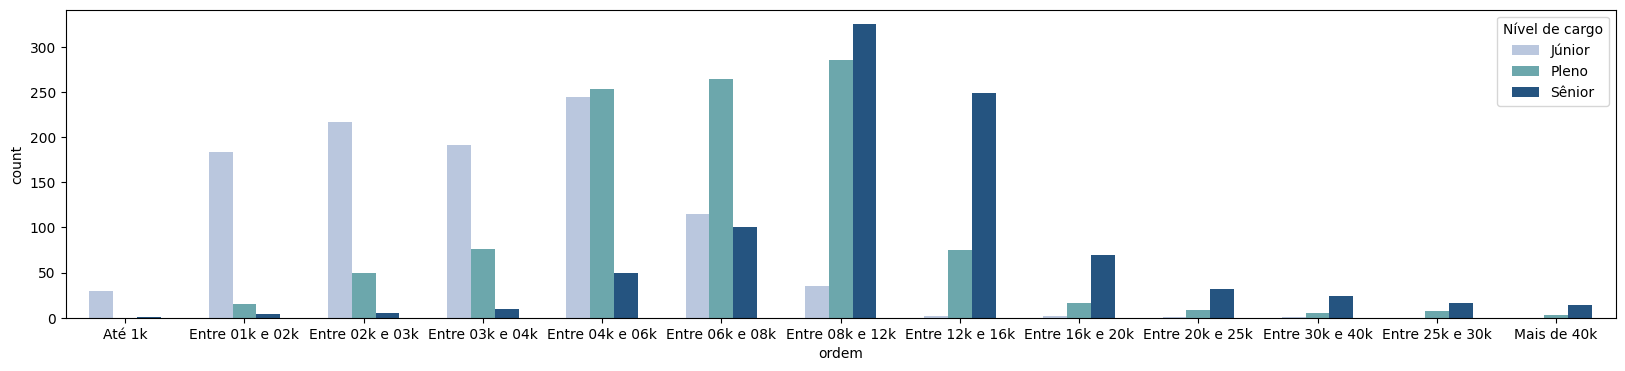

In [45]:
# dodge bars

faixa_salarial = parte2[['P2_h', 'P2_g']].value_counts(dropna = False).to_frame().reset_index()

ordem_salario = {'Menos de R$ 1.000/mês': 'Até 1k',
                 'de R$ 1.001/mês a R$ 2.000/mês': 'Entre 01k e 02k',
                 'de R$ 2.001/mês a R$ 3.000/mês': 'Entre 02k e 03k',
                 'de R$ 3.001/mês a R$ 4.000/mês': 'Entre 03k e 04k',
                 'de R$ 4.001/mês a R$ 6.000/mês': 'Entre 04k e 06k',
                 'de R$ 6.001/mês a R$ 8.000/mês': 'Entre 06k e 08k',
                 'de R$ 8.001/mês a R$ 12.000/mês': 'Entre 08k e 12k',
                 'de R$ 12.001/mês a R$ 16.000/mês': 'Entre 12k e 16k',
                 'de R$ 16.001/mês a R$ 20.000/mês': 'Entre 16k e 20k',
                 'de R$ 20.001/mês a R$ 25.000/mês': 'Entre 20k e 25k',
                 'de R$ 25.001/mês a R$ 30.000/mês': 'Entre 25k e 30k',
                 'de R$ 30.001/mês a R$ 40.000/mês': 'Entre 30k e 40k',
                 'Acima de R$ 40.001/mês': 'Mais de 40k'}

faixa_salarial['ordem'] = faixa_salarial['P2_h'].map(ordem_salario)

plt.figure(figsize = (20, 4))

cores = {'Júnior': '#b4c5e4',
         'Pleno': '#61b0b7',
         'Sênior': '#16558f'}

sns.barplot(data = faixa_salarial.sort_values(['P2_g', 'ordem']), x = 'ordem', y = 'count', hue = 'P2_g', palette = cores, width = 0.6)

plt.legend(title = 'Nível de cargo')

## 4. Pergunta 1 - O que influencia na insatisfação dos profissionais na empresa em que trabalham atualmente?

### 4.0. Distribuição da satisfação

In [125]:
satisfacao_trabalho = parte2['P2_k'].value_counts(dropna = False).to_frame().reset_index()
satisfacao_trabalho['percentual'] = round(satisfacao_trabalho['count'] * 100 / len(parte1), 1)

satisfacao_trabalho

,P2_k,count,percentual
0,True,2734,64.0
1,False,960,22.5
2,NaN,577,13.5


### 4.1. Empresas com uma área de dados mais madura possuem funcionários mais satisfeitos?

O que é uma empresa madura?

- Número de pessoas que atuam com dados na empresa em relação ao tamanho da empresa
- Número de cargos de dados diferentes na empresa

In [52]:
perc_missings(n_df = 2)

,codigo,descricao,pergunta,opcao,perc_miss
0,P2_a,Qual sua situação atual de trabalho?,a,None,0.00
1,P2_b,Setor,b,None,13.51
2,P2_c,Numero de Funcionarios,c,None,13.51
3,P2_d,Gestor?,d,None,13.51
4,P2_e,Cargo como Gestor,e,None,83.31
5,P2_f,Cargo Atual,f,None,30.20
6,P2_g,Nivel,g,None,30.20
7,P2_h,Faixa salarial,h,None,13.51
8,P2_i,Quanto tempo de experiência na área de dados você tem?,i,None,13.51
9,P2_j,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,j,None,13.51


In [57]:
satisfacao_maturidade_empresa = parte2[['P0', 'P2_c']].merge(parte3[['P0', 'P3_a', 'P3_b']], 
                                                             on = 'P0', 
                                                             how = 'left')

satisfacao_maturidade_empresa['n_cargos'] = satisfacao_maturidade_empresa['P3_b'].str.count(',') + 1
satisfacao_maturidade_empresa

,P0,P2_c,P3_a,P3_b,n_cargos
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,Acima de 3.000,NaN,NaN,NaN
1,zzls2oftfn9law393oezzls2ofhvfpzd,Acima de 3.000,1 - 3,Engenharia de Dados/Data Engineer,1.0
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,Acima de 3.000,NaN,NaN,NaN
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,Acima de 3.000,NaN,NaN,NaN
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,de 101 a 500,NaN,NaN,NaN
...,...,...,...,...,...
4268,01jnrn9f6va0menfhk2ztm01jnrn96bp,Acima de 3.000,NaN,NaN,NaN
4269,01dyfxam4u4bi29fem01dyfxaq9akvqp,de 51 a 100,NaN,NaN,NaN
4270,00zw9ks9d40z4u00zz3d20iix65qpli3,de 101 a 500,4 - 10,"Engenharia de Dados/Data Engineer, Cientista de Dados/Data Scientist, Analista de Dados/Data Analyst",3.0
4271,00xu7yujd7s57emj00xu7y0c3njix3de,de 1.001 a 3.000,NaN,NaN,NaN


In [65]:
satisfacao_maturidade_empresa[['P2_c', 'P3_a']].value_counts(dropna = False).to_frame().sort_values(['P2_c', 'count'])

count
P2_c             P3_a                                                       
Acima de 3.000   1 - 3                                                     8
                 Ainda não temos pessoas atuando com dados na empresa      8
                 4 - 10                                                   12
                 21 - 50                                                  19
                 11 - 20                                                  20
                 51 - 100                                                 23
                 101 - 300                                                57
                 Acima de 300 pessoas                                    112
                 NaN                                                    1266
de 1 a 5         4 - 10                                                    4
                 1 - 3                                                    21
                 Ainda não temos pessoas atuando com dados na empresa     33
                 NaN                                                      58
de 1.001 a 3.000 1 - 3                                                     4
                 Acima de 300 pessoas                                      5
                 Ainda não temos pessoas atuando com dados na empresa      6
                 101 - 300                                                 9
                 4 - 10                                                    9
                 11 - 20                                                  12
                 51 - 100                                                 18
                 21 - 50                                                  21
                 NaN                                                     366
de 101 a 500     Acima de 300 pessoas                                      2
                 101 - 300                                                 6
                 Ainda não temos pessoas atuando com dados na empresa     10
                 51 - 100                                                 10
                 21 - 50                                                  20
                 1 - 3                                                    20
                 11 - 20                                                  36
                 4 - 10                                                   39
                 NaN                                                     560
de 11 a 50       21 - 50                                                   3
                 11 - 20                                                   8
                 4 - 10                                                   14
                 Ainda não temos pessoas atuando com dados na empresa     15
                 1 - 3                                                    19
                 NaN                                                     193
de 501 a 1.000   Acima de 300 pessoas                                      2
                 51 - 100                                                  3
                 101 - 300                                                 4
                 1 - 3                                                     4
                 Ainda não temos pessoas atuando com dados na empresa      6
                 4 - 10                                                    9
                 11 - 20                                                   9
                 21 - 50                                                  17
                 NaN                                                     292
de 51 a 100      51 - 100                                                  1
                 21 - 50                                                   2
                 11 - 20                                                   4
                 Ainda não temos pessoas atuando com dados na empresa      4
                 4 - 10                                            

In [50]:
pd.set_option('display.max_colwidth', None)
perc_missings(n_df = 3)

,codigo,descricao,pergunta,opcao,perc_miss
0,P3_a,Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?,a,None,83.31
1,P3_b,Quais desses papéis/cargos fazem parte do time (ou chapter de dados da sua empresa?,b,None,83.84
2,P3_b_1,Analytics Engineer,b,1,83.77
3,P3_b_2,Engenharia de Dados/Data Engineer,b,2,83.77
4,P3_b_3,Analista de Dados/Data Analyst,b,3,83.77
5,P3_b_4,Cientista de Dados/Data Scientist,b,4,83.77
6,P3_b_5,Database Administrator/DBA,b,5,83.77
7,P3_b_6,Analista de Business Intelligence/BI,b,6,83.77
8,P3_b_7,Arquiteto de Dados/Data Architect,b,7,83.77
9,P3_b_8,Data Product Manager/DPM,b,8,83.77


## 5. Pergunta 2 - Estes profissionais estão mais propensos a sair da empresa atual e aceitar uma nova proposta?